# Week 1 - The What Why and when of Machine Learning
Main idea is to follow that notebook in order to have an initial aproach -  this doesn't means that you only have to answer to the questions or implement code. Feel free to add all the interesting content that you find and take conclusions from the data. Please just use this as a template

# 0. Library import and list input files

In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sys

#Pandas more columns
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)

# Add input as import path
sys.path.insert(0,'../input')

# Plot style
plt.style.use('fivethirtyeight')

# Input data files are available in the "../input/" directory. Only linux
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))


# 1. Data import and first impressions

### 1.1 Load dataset and have an overview.
Objectives:
* Load the data
* Understand the data

Questions:
* Q1: How many people in your training set have survived the Titanic disaster?
* Q2: How many samples we have?
* Q3: Average age.


In [2]:
# Import the data from the dataset
train_data = pd.read_csv('../input/train.csv',index_col='id')
test_data = pd.read_csv('../input/test.csv',index_col='id')
# display(train_data)

# ToDO 1: Show the fist n entries of the table
# n = random.randint(1,9)
n = 5
# print(train_data[0:n])
# ToDo 2: Rename the attributes with a fancy name
# train_data = train_data.rename({'sex':'gender'}, axis='columns') <-- Why not this one?
train_data = train_data.rename(index=str, columns={'sex':'gender'})
print(train_data)
# Todo 3: Questions

# Q1: How many people in your training set have survived the Titanic disaster?
# print(train_data[train_data['survived']==1])
print("Survivors: ", train_data['survived'].value_counts()[1])
# Q2: How many samples we have?
print("Total samples: ", train_data.shape[0])
# Q3: Average age.
# print("Average age: ", train_data.age.dropna(axis=0, how='all'))
print("Average age: ", train_data.age.mean(skipna=True))

      pclass  survived                                               name  \
id                                                                          
277        1         1     Spencer, Mrs. William Augustus (Marie Eugenie)   
562        2         1                          Slayter, Miss. Hilda Mary   
111        1         1                     Fortune, Miss. Alice Elizabeth   
930        3         0                                Kiernan, Mr. Philip   
841        3         0                               Hagardon, Miss. Kate   
585        2         0                                 Weisz, Mr. Leopold   
609        3         0                                    Adams, Mr. John   
540        2         1                           Quick, Miss. Phyllis May   
1075       3         0                             Odahl, Mr. Nils Martin   
390        2         0                          Deacon, Mr. Percy William   
921        3         0                                  Keefe, Mr. Arthur   

### 1.2 Plot the data
Objectives:

* Divide the features in two categories: numerical and categorical.
* Represent each one of the features with one plot.
* Create a new boolean feature named Child that the defines if the passenger is a kid or not.

Notes:

Try to show multiple plots using the :
```
fig = plt.figure(figsize=(18,18))
sns.distplot(train_data[column].dropna(),ax=plt.subplot(221));
```



#### Numerical
Questions:
* Q1: How many kids survived to the accident?
* Q2: Pclass feature is important?
* Q3: Which is the biggest cabin number?
* Q4: Which is the proportion depending on the Fare of the passengers?

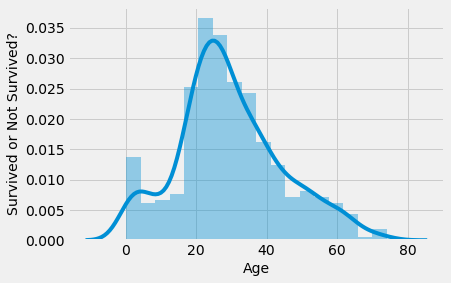

In [8]:
"""Plot Example"""
# Example Survived/Age
sns.distplot(train_data["age"].dropna());
# X-axis Label
plt.xlabel('Age', fontsize=14);
# Y-axis Label
plt.ylabel("Survived or Not Survived?", fontsize=14);
# Printing Chart
plt.show()


Survivor kids:  39

First Class survival rate:  64.77987421383648
Second Class survival rate:  45.51724137931034
Third Class survival rate:  24.285714285714285


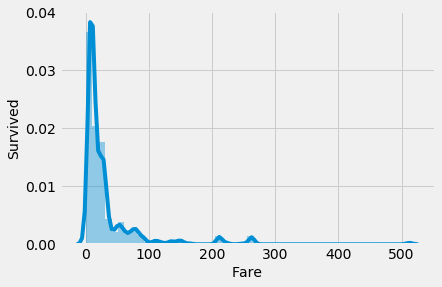

In [76]:
# Questions
# Q1: How many kids survived to the accident?
# We consider 0 to 14 years old
print("Survivor kids: ", train_data[(train_data['age'] < 15) & (train_data['survived'] == 1)].shape[0])
# Q2: Pclass feature is important?
# It definitely is, the better the class the more possibilities to survive
print("\r\nFirst Class survival rate: ", ((train_data[(train_data['pclass'] == 1) & (train_data['survived'] == 1)].shape[0]) * 100) / (train_data[(train_data['pclass'] == 1)].shape[0]))
print("Second Class survival rate: ", ((train_data[(train_data['pclass'] == 2) & (train_data['survived'] == 1)].shape[0]) * 100) / (train_data[(train_data['pclass'] == 2)].shape[0]))
print("Third Class survival rate: ", ((train_data[(train_data['pclass'] == 3) & (train_data['survived'] == 1)].shape[0]) * 100) / (train_data[(train_data['pclass'] == 3)].shape[0]))

# print("First Class total: ", (train_data[(train_data['pclass'] == 1)].shape[0]))
# print("Second Class total: ", (train_data[(train_data['pclass'] == 2)].shape[0]))
# print("Third Class total: ", (train_data[(train_data['pclass'] == 3)].shape[0]))
# print("First Class survivors: ", train_data[(train_data['pclass'] == 1) & (train_data['survived'] == 1)].shape[0])
# print("Second Class survivors: ", train_data[(train_data['pclass'] == 2) & (train_data['survived'] == 1)].shape[0])
# print("Third Class survivors: ", train_data[(train_data['pclass'] == 3) & (train_data['survived'] == 1)].shape[0])

# Q3: Which is the biggest cabin number?
# Q4: Which is the proportion depending on the Fare of the passengers?

# Example Survived/Age
sns.distplot(train_data["fare"].dropna());
# sns.countplot(train_data["survived"].dropna());
# X-axis Label
plt.xlabel('Fare', fontsize=14);
# Y-axis Label
plt.ylabel("Survived", fontsize=14);
# Printing Chart
plt.show()

#### Categorical
Questions:
* Q1:  How many woman/man died?
* Q2:  Where did the most people embark?
* Q3:  How many johns are in the boat?
* Q4:  How many embarked places exist?
* Q5:  Name repetitions

No handles with labels found to put in legend.


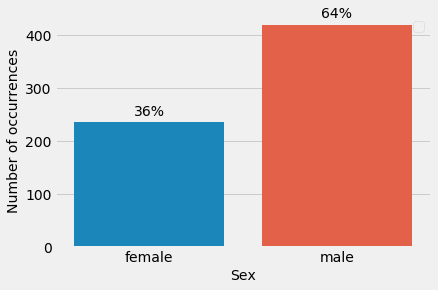

In [67]:
"""Plot Example"""
ax = sns.countplot(x="gender", data=train_data);
# X-axis Label
plt.xlabel("Sex", fontsize=14);
# Y-axis Label
plt.ylabel('Number of occurrences', fontsize=14)
# Setting Legend location 
plt.legend(loc=1);

# Add percents over bars
# Get heights of our bars
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
# Coun number of bar groups 
ncol = int(len(height)/2)
# Coun total height of groups
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
# Loop through bars
for i, p in enumerate(ax.patches):   
    # Adding percentages   
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
        '{:1.0%}'.format(height[i]/float(total[i])), ha="center", size=14) 

plt.show()
    

No handles with labels found to put in legend.


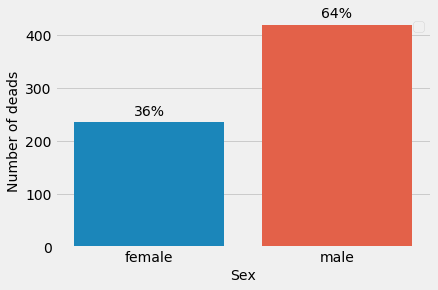

In [68]:
""" Your work """
# Questions
# Q1: How many woman/man died?
ax = sns.countplot(x="gender", data=train_data);
# X-axis Label
plt.xlabel("Sex", fontsize=14);
# Y-axis Label
plt.ylabel('Number of deads', fontsize=14)
# Setting Legend location 
plt.legend(loc=1);

# Add percents over bars
# Get heights of our bars
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
# Coun number of bar groups 
ncol = int(len(height)/2)
# Coun total height of groups
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
# Loop through bars
for i, p in enumerate(ax.patches):   
    # Adding percentages   
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
        '{:1.0%}'.format(height[i]/float(total[i])), ha="center", size=14) 

plt.show()


# Q2: Where did the most people embark?
# Q3: How many johns are in the boat?
# Q4: How many embarked places exist?
# Q5: Name repetitions

### 1.3 Fill missing data
Objectives:
* Think in how to fill missing data
    Ex: Missing Embarked can be filled depending on the Fare?
*  Discuss the importance of fill the missing data


In [ ]:
# ToDo 1: Show the missing data for each feature
train_data.info()

# ToDo 2: Propose at least one method to fill the missing data of one feature

# 2. First prediction

In [ ]:
# ToDo 1: Use the gender feature to classify the test_data
test_data["survived"] = 0
test_data.loc[test_data["fare"] > 9 , "survived"] = 1


In [ ]:
from utils import accuracy_score
# Compute the accuracy of your first predicter
print "Current accuracy: %f" % accuracy_score(test_data)